### 1. For the boston dataset given in HW2, create a heatmap with all the features - 1 point

In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

bdata = datasets.load_boston()
data = pd.DataFrame(data=bdata['data'], columns=bdata['feature_names'])

data['MEDV'] = bdata['target'] #adding MEDV values to the dataset
data_hm = data.corr()
print(data_hm)
sns.heatmap(data_hm,cmap='Blues')

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

### 2. Apply feature selection on the dataset. Try to find the top k features which improves the score in the next questions - 1 point each

In [2]:
# feature selection reduces overfitting, improves accuracy and reduces training time
# I am using wrapper method, selectKBest feature selection technique along with chi-square

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2

data[0:] = data[0:].astype(float)

# from heatmap we note that top 4 features that have maximum influence on MEDV are LSTAT,RM,PTRATIO and INDUS with values -0.73,0.69,-0.5,-0.48 respectively

features = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['PTRATIO'], data['INDUS']], columns = ['LSTAT','RM','INDUS','PTRATIO'])
label = np.array(data['MEDV'])
#print(features.head())
#print(features.shape)
#print(type(label))

# Using SeelctKBest feature selection method we get same 4 features.
feature_ext = SelectKBest(f_regression, k = 4)
frt = feature_ext.fit_transform(data.iloc[:,:13], data.iloc[:,13])
final = feature_ext.get_support()
print(final)

[False False  True False False  True False False False False  True False
  True]


### 3. Apply Linear regression and Ridge regression and plot the coefficient for each feature. Try different aplha values as well and comment what do you observe. -3 points

Use different marker for each model if plotting in same figure.

Co-efficients for each feature LSTAT,RM,INDUS and PTRATIO respectively  [-0.57571066  4.51517866 -0.93512212  0.00756681]


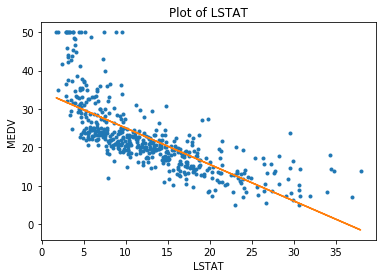

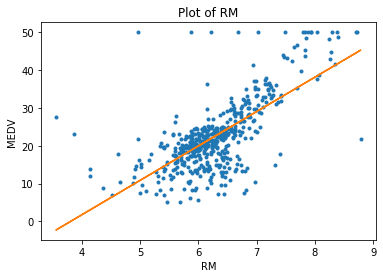

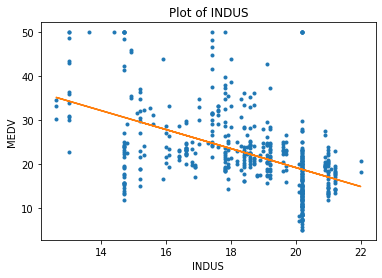

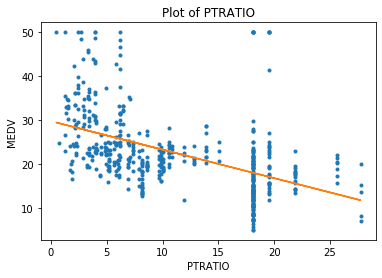

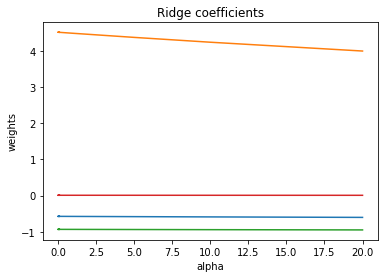

Co-efficients for each feature LSTAT,RM,INDUS and PTRATIO respectively  [-0.60427251  3.99561996 -0.95054351  0.00653597]


In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge

LR = LinearRegression()
LR.fit(features,label)
print("Co-efficients for each feature LSTAT,RM,INDUS and PTRATIO respectively ", LR.coef_)

for i in ['LSTAT','RM','INDUS','PTRATIO']:
    plt.figure(figsize=(6,4))
    plt.plot(features[i],label,'.')
    plt.title("Plot of " + str(i))
    plt.ylabel("MEDV")
    plt.xlabel(i)
    m, b = np.polyfit(features[i],label, 1)
    plt.plot(features[i], m*features[i] + b)
    plt.show()

coef = []
intercept = []
alphalst = [0.00001,0.001,0.01,0.1,0,1,5,10,20]

for a in alphalst:
    reg = Ridge(alpha = a)
    reg.fit(features, label)
    coef.append(reg.coef_)
    intercept.append(reg.intercept_)

axes = plt.gca()
axes.plot(alphalst,coef)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients')
plt.axis('tight')
plt.show()

print("Co-efficients for each feature LSTAT,RM,INDUS and PTRATIO respectively ", reg.coef_)

### 4. Use the HCC.csv file. Split the data into 70:30. Apply Ridge and lasso regression on the data to predict alive or dead. -5 points

In this question you are expected to figure out the difference between the two regularization technique as well as when to use which. Comment your findings. Try plotting coefficents as well for better understanding.

In [4]:
import sklearn.utils 
import sklearn.model_selection
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("HCC.csv", header=None)
data_set = data.iloc[1:,:]
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data_set.iloc[:,:40],data_set.iloc[:,40], shuffle='True', test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

ridgereg = Ridge(alpha=2, normalize=True) #after trying multiple alpha values this value gives optimum fit
ridgereg.fit(x_train,y_train)

y_pred_train = ridgereg.predict(x_train)
y_pred_test = ridgereg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print('MSE: ',mse)
rsq = r2_score(y_train,y_pred_train)
print('R-2, Training: ',rsq)
rsq = r2_score(y_test,y_pred_test)
print('R-2, Testing: ',rsq)



(109, 40)
(109,)
(47, 40)
(47,)
MSE:  0.2164966638268288
R-2, Training:  0.3297879279715715
R-2, Testing:  0.13047067201188223


In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01) #after trying multiple alpha values this value gives optimum fit
lasso.fit(x_train,y_train)

y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

print('MSE-training data: ',mean_squared_error(y_train,y_pred_train))
print('MSE-Testing data:',mean_squared_error(y_test,y_pred_test))
print('R-2 training data: ',r2_score(y_train,y_pred_train))
print('R-2 Testing data',r2_score(y_test,y_pred_test))

# lasso regression penalises less important features and makes them zero and is hence more preferred over ridge regression 
# ridge however remove certain signals from data even when they are useful for prediction 

MSE-training data:  0.11322176699342244
MSE-Testing data: 0.2298973271752912
R-2 training data:  0.49504961950118165
R-2 Testing data 0.07664873503596692
